<a href="https://colab.research.google.com/github/JimenezHAnaFer/MetodosN/blob/main/Iterpolacion_Hermite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hermite**

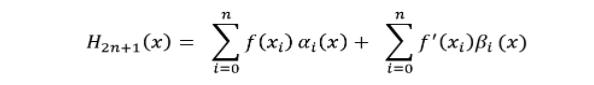

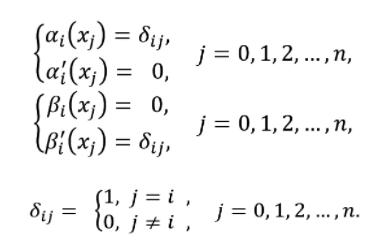

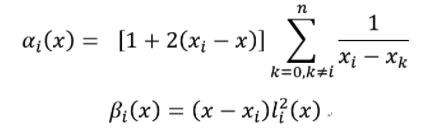

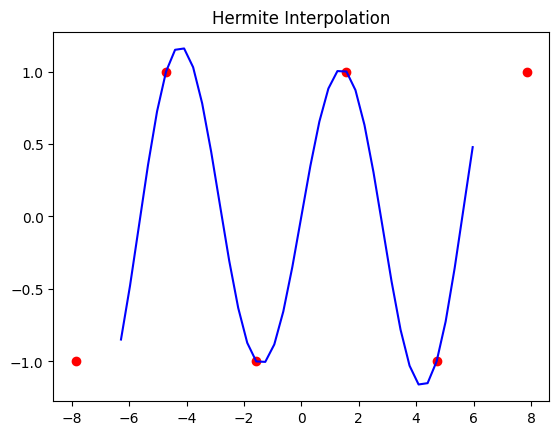

In [32]:
#Hermite Interpolacion

import matplotlib.pyplot as plt
import numpy as np

# Se calcula el valor derivado de la función base
def dl(i, xi):
	result = 0.0
	for j in range(0,len(xi)):
		if j!=i:
			result += 1/(xi[i]-xi[j])
	result *= 2
	return result

 # Se calcula el valor de la función base
def l(i, xi, x):
	deno = 1.0
	nu = 1.0

	for j in range(0, len(xi)):
		if j!= i:
			deno *= (xi[i]-xi[j])
			nu *= (x-xi[j])

	return nu/deno

 #Función de interpolación
def get_Hermite(xi, yi, dyi):
	def he(x):
		result = 0.0
		for i in range(0, len(xi)):
			result += (yi[i]+(x-xi[i])*(dyi[i]-2*yi[i]*dl(i, xi))) * ((l(i,xi,x))**2)
		return result
	return he

import math
sr_x = [(i * math.pi) + (math.pi / 2) for i in range(-3, 3)]
sr_fx = [math.sin(i) for i in sr_x]
deriv = [0 for i in sr_x] # todas las derivadas son 0
Hx = get_Hermite (sr_x, sr_fx, deriv) # Obtiene la función de interpolación
tmp_x = [i * 0.1 * math.pi for i in range(-20, 20)] # casos de prueba
tmp_y = [Hx (i) for i in tmp_x]

 #
plt.plot(sr_x, sr_fx, 'ro')
plt.plot(tmp_x, tmp_y, 'b-')
plt.title('Hermite Interpolation')
plt.show()

In [30]:
import numpy as np
from sympy import Symbol, expand, pprint, lambdify

x=Symbol('x') #ponemos a x de manera simbolica

def diferencia(x,y,yp):
  n=len(x)
  z=np.empty(shape=2*n, dtype=float)
  Q=np.empty(shape=(2*n, 2*n), dtype=float)
  d=np.empty(shape=2*n, dtype=float)
  #hacemos referencia a un array vacio para poder usarlas

  for i in np.arange(n): #En esta parte comenzamos a inicializar los valores de los subindices
    z[2+i]=x[i]
    z[2+i+1]=x[i]
    Q[2+i][0]=y[i]
    Q[2+i +1][0]=y[i]
    Q[2+i +1][1]=yp[i]
    if i != 0:
      Q[2*i][1]=(Q[2*i][0] - Q[2*i -1][0])/(z[2*i] - z[2*i -1]) #Formula de Hermite

    for i in np.arange(2,2+(n-1)+2):#comenzamos a calcular tanto num como denom por separado y ciclicamente
      for j in np.arange(2,i+1):
       f=Q[i][j-1]-Q[i-1][j-1]
       g=z[i]-z[i-j]
       Q[i][j]=f/g #creamos una matriz con los valores que se guardaron en f y g
       #Y juntamos ambas y las dividimos entre si
  d=Q.diagonal() #pero lo unico que buscamos es la diagonal
  #con este separamos la diagonal de lo demas e imprimimos
  return z,d


def polhermitesym(diff,z): #pasamos las diferencias y podemos crear el polinomio de H
  n=len(z)-1
  pol=diff[n]
  for k in np.arange(1,n+1):
    pol=diff[n-k]+(x-z[n-k])*pol
  return pol
#DATOS
datos_x=np.array([1.3,1.6,1.9], dtype=float)
datos_y=np.array([0.6200850, 0.4554022, 0.2818186], dtype=float)
datos_yp=[-0.522032, -0.5698959, -0.5811571] #derivada

d = diferencia(datos_x, datos_y, datos_yp) #pasamos los datos a la funcion
diff=d[1] #seleccionamos la 1 fila de la matriz
polhermitesym=polhermitesym(diff, d[0])#calculamos ya el polinomio de H
#usamos pprint para visualizarlo en formato latex
pprint("El polinomio de hermite es: \n")
pprint(expand(polhermitesym)) #alargamos la expresion matematica para todo el polinomio
print("\n")
pprint('El valor aproximado de x={0} es: H({0})={1}'.format(1.5, polhermitesym.subs(x,1.5))) #tomamos a 1.5 como el punto que queremos aproximar



El polinomio de hermite es: 
                     5                    4                     3             
- 0.372658441413748⋅x  + 2.1211900975975⋅x  - 3.56743155264161⋅x  - 0.21061171

         2                                          
7076635⋅x  + 4.94008999405536⋅x + 0.0894216194791349


El valor aproximado de x=1.5 es: H(1.5)=2.89424858657601
